

Датасет `data.csv` містить дані про студентів та підсумкові семестрові оцінки. 

Цільовою змінною є "GRADE" -- це підсумкова оцінка за семестр (мінімальне значення 0, максимальне 20)

Файл `attributes.csv` містить повні назви ознак.

Датасет `predict.csv` не містить оцінок і призначений для зовнішнього оцінювання. 













In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

## Завдання 1

[3 бали] 

Імпортувати датасет `data.csv` у об'єкт `DataFrame` і провести попередній аналіз даних засобами `pandas`, `matplotlib`, `seaborn`.  

In [9]:
data = pd.read_csv("data.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13


# Загальна інформація про датасет

In [3]:
data.shape

(944, 32)

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,16.688559,2.636653,2.404661,1.507415,1.985169,0.253178,3.940678,3.192797,3.145127,1.475636,2.282839,3.527542,4.385593,2.284653,11.469280
std,1.204638,1.129181,1.098258,0.723744,0.832653,0.645147,0.907538,1.028188,1.137949,0.877091,1.268545,1.434791,6.331564,0.679939,3.794162
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.302585,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.208274,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,2.406945,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,2.572612,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,2.949688,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      944 non-null    object 
 1   sex         944 non-null    object 
 2   age         944 non-null    int64  
 3   address     944 non-null    object 
 4   famsize     944 non-null    object 
 5   Pstatus     944 non-null    object 
 6   Medu        944 non-null    int64  
 7   Fedu        944 non-null    int64  
 8   Mjob        944 non-null    object 
 9   Fjob        944 non-null    object 
 10  reason      944 non-null    object 
 11  guardian    944 non-null    object 
 12  traveltime  944 non-null    int64  
 13  studytime   944 non-null    int64  
 14  failures    944 non-null    int64  
 15  schoolsup   944 non-null    object 
 16  famsup      944 non-null    object 
 17  paid        944 non-null    object 
 18  activities  944 non-null    object 
 19  nursery     944 non-null    o

In [11]:
num_features, cat_features = data.select_dtypes([np.number]).drop(columns=["GRADE"]).columns, data.select_dtypes([np.object_]).columns

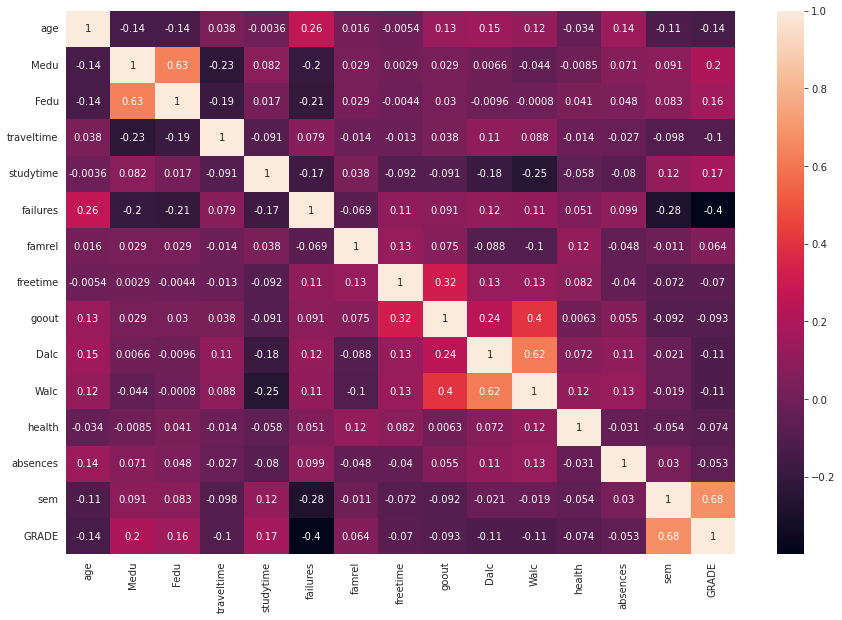

In [12]:
plot = sns.heatmap(data.corr(), annot=True)
plot.figure.set_size_inches(15, 10)

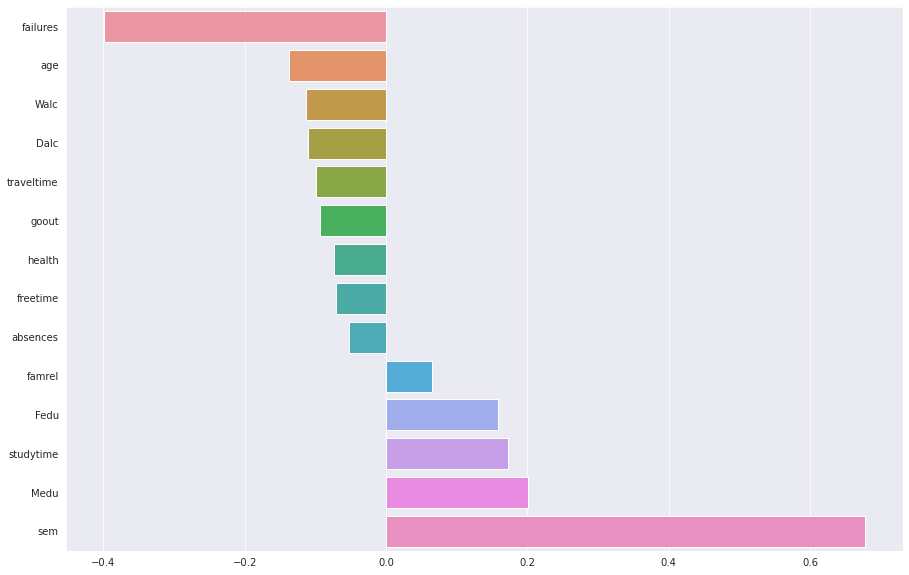

In [8]:
cor = data[num_features].corrwith(data.GRADE).sort_values()

plot = sns.barplot(x=cor, y=cor.index)
plot.figure.set_size_inches(15, 10)

# Шукаємо нан значення

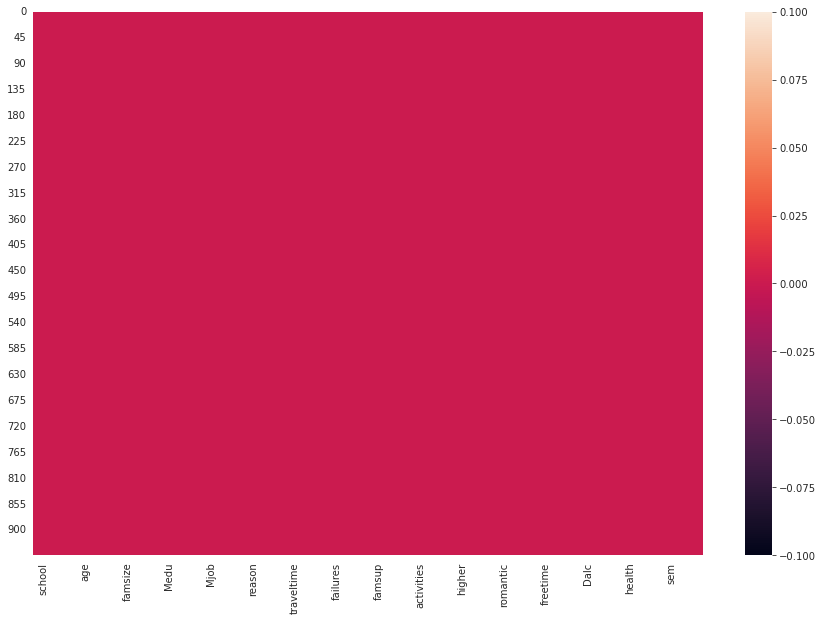

In [9]:
plot = sns.heatmap(data.isnull())
plot.figure.set_size_inches(15, 10)

# Перевіряємо на наявність аномальних значень

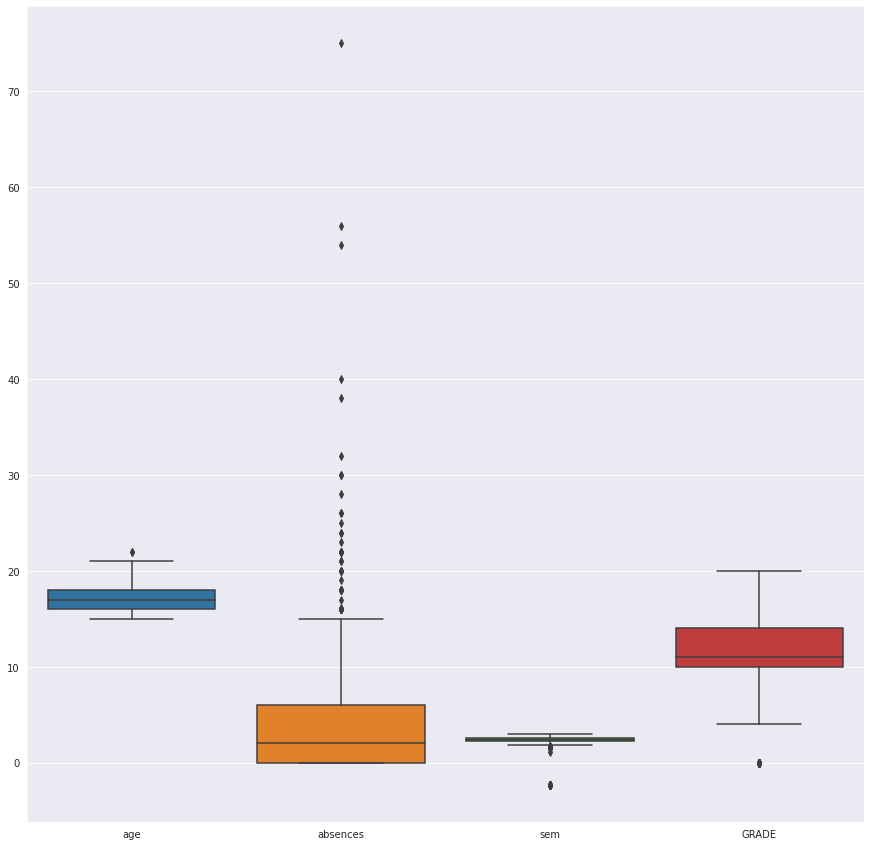

In [10]:
plot = sns.boxplot(data=data[['age', 'absences', 'sem', 'GRADE']])
plot.figure.set_size_inches(15, 15)

### Аномальні значення присутні але розбиратись ми з ними будемо пізніше при побудові найкращої моделі (можливо, якщо точність буде недостатньою)

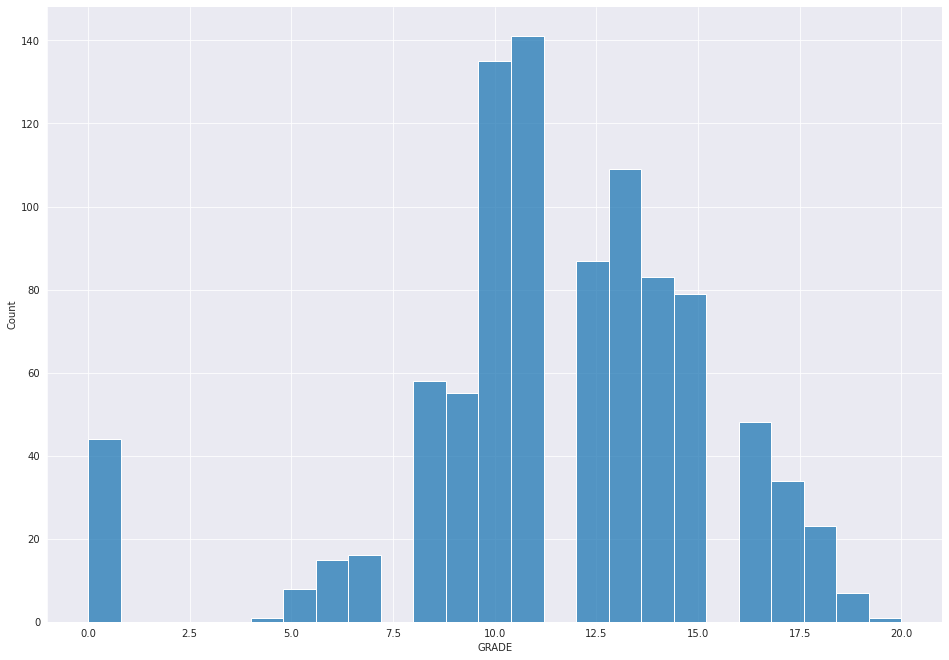

In [11]:
plot = sns.displot(data.GRADE)
plot.figure.set_size_inches(15, 10)

## Завдання 2

[3 бали] 

Навчити модель лінійної регресії (`sklearn.linear_model.LinearRegression`) лише за числовими ознаками. 

Розглянути також варіанти з регуляризацією (`Ridge`, `Lasso`). Знайти оптимальні параметри регуляризації (`alpha`) за допомогою процедури крос-валідації.

Для всіх моделей знайти коефіцієнт детермінації на відкладеній вибірці.

Зробити висновки.

# Робимо train test split тільки по data з num features

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data[num_features], data.GRADE, test_size=0.3, random_state=1)

# Створюємо функцію для швидкого виводу точності моделі з використанням звичних метрик

In [13]:
def measure(y_train_pred, y_test_pred, y_train, y_test):
    print(f"Mean squared error:\n  test: {mean_squared_error(y_test, y_test_pred, squared=False)}\n  train: {mean_squared_error(y_train, y_train_pred, squared=False)}\n\nR2 score:\n  test: {r2_score(y_test, y_test_pred)}\n  train: {r2_score(y_train, y_train_pred)}\n\nAccuracy score:\n  test: {accuracy_score(y_test, y_test_pred.round())}\n  train: {accuracy_score(y_train, y_train_pred.round())}")

# Будуємо та відразу оцінюємо першу модель Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)

y_test_pred = model_lin_reg.predict(X_test)
y_train_pred = model_lin_reg.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.872103499032372
  train: 2.4944113842534605

R2 score:
  test: 0.5040272339516197
  train: 0.5353156566652272

Accuracy score:
  test: 0.20774647887323944
  train: 0.21363636363636362


In [15]:
cross_score = cross_val_score(model_lin_reg, data[num_features], data.GRADE, scoring="neg_mean_squared_error", cv=10)
print(-cross_score)
print((-cross_score).mean())

[ 4.30144988  3.57035846  2.66096746  6.6124921   2.86901376  7.11281049
  8.17166835 13.37679244  8.36299407 17.05993098]
7.409847799004055


# Знайдемо точність базової чи нульової моделі яка будується з використанням середнього значення target, щоб було з чим порівнювати точність наших моделей

In [16]:
print(f"Mean squared error:\n{mean_squared_error(data.GRADE, data.GRADE.mean() * np.ones(data.shape[0]), squared=False)}\n\nR2 score:\n{r2_score(data.GRADE, data.GRADE.mean() * np.ones(data.shape[0]))}\n\nAccuracy score:\n{accuracy_score(data.GRADE, round(data.GRADE.mean()) * np.ones(data.shape[0]))}")

Mean squared error:
3.7921513937310256

R2 score:
0.0

Accuracy score:
0.149364406779661


### Ми можемо спостерігати, що R2 score = 0, отже модель побудована правильно. Якщо порівнювати то легко бачити що лінійна регресія показує себе гірше навіть ніж константна модель, але перед тим як робити висновки потрібно спробувати інші моделі, хоч вже можна бачити high bias отже регуляризатори наврядчи допоможуть. В такому випадку потрібно ускладними модель, наприклад додати фіч.
# Спробуємо Ridge та спершу скористаємось підбором параметра

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


alpha_tmp = np.logspace(-3, 3, 100)

searcher = GridSearchCV(Ridge(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(data[num_features], data.GRADE)
ridge_best_alpha = searcher.best_params_["alpha"]
ridge_best_alpha

35.111917342151344

# Та побудуємо саму модель

In [18]:
model_ridge = Ridge(alpha=ridge_best_alpha)
model_ridge.fit(X_train, y_train)

y_test_pred = model_ridge.predict(X_test)
y_train_pred = model_ridge.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.902985682433127
  train: 2.506987539088925

R2 score:
  test: 0.4933040353186964
  train: 0.5306182165516681

Accuracy score:
  test: 0.176056338028169
  train: 0.19696969696969696


In [19]:
cross_score = cross_val_score(model_ridge, data[num_features], data.GRADE, scoring="neg_mean_squared_error", cv=10)
print(-cross_score)
print((-cross_score).mean())

[ 4.00969677  3.65236352  2.8134266   7.05809575  3.03272568  6.27711478
  8.44092649 12.39976122  8.41132327 17.28605883]
7.338149291419083


### Як і очікувалось точність не сильно змінилась
# Тепер спробуємо Lasso

In [20]:
from sklearn.linear_model import Lasso


alpha_tmp = np.logspace(-3, 3, 100)

searcher = GridSearchCV(Lasso(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(data[num_features], data.GRADE)
lasso_best_alpha = searcher.best_params_["alpha"]
lasso_best_alpha

0.11497569953977356

# Побудова моделі

In [21]:
model_lasso = Lasso(alpha=lasso_best_alpha)
model_lasso.fit(X_train, y_train)

y_test_pred = model_lasso.predict(X_test)
y_train_pred = model_lasso.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.897639921101696
  train: 2.514010562574931

R2 score:
  test: 0.4951684480428181
  train: 0.5279846999646622

Accuracy score:
  test: 0.1795774647887324
  train: 0.21212121212121213


In [22]:
cross_score = cross_val_score(model_lasso, data[num_features], data.GRADE, scoring="neg_mean_squared_error", cv=10)
print(-cross_score)
print((-cross_score).mean())

[ 4.11324809  3.54876046  2.80531243  7.03859248  2.97975595  6.35996679
  8.51232411 12.71566866  8.12084283 16.73117697]
7.2925648757061365


### Lasso так же ж нам не підходить, але на жаль ми вичерпали ресурси першого завдання. Орієнтуючись на ці три моделі можна зробити висновки, що ми маємо справу боротьби з high bias і багатоймовірно в майбутньому і з high variance. На даний момент нам потрібно додати фіч, наприклад спробувати зі всіма фічами як в наступньому завданні та додати ще якимось чином

## Завдання 3

[5 балів] 

Навчити модель лінійної регресії з використанням усіх ознак (застосувати one-hot кодування, бінаризацію тощо до нечислових ознак).

* Спробувати `LinearRegression`, `Ridge`, `Lasso`, `SGDRegressor(loss='squared_error')`, експерементуючи з кількістю і складом ознак та  підбором основних гіперпараметрів. 
    * `alpha` для `Ridge` та `Lasso`
    * `penalty`, `alpha`, `learning_rate` для `SGDRegressor` за допомогою `GridSearchCV`
* Мета -- отримати якомога кращий результат. 
* Знайти коефіцієнт детермінації для найкращих моделей на відкладеній вибірці.


# Робимо train test split знову тільки цього разу на всій вибірці

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["GRADE"]), data.GRADE, test_size=0.3, random_state=1)

# Створюємо Column Transformer який будемо використовувати для подальших моделей

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


col_trans_scaling_ohe = ColumnTransformer([("ohe", OneHotEncoder(), cat_features),
                                           ("scaling", StandardScaler(), num_features)
                                          ])

# Створюємо Linear Regression на всьому дата сеті з scaling та з ohe

In [25]:
from sklearn.pipeline import Pipeline

model2_lin_reg = Pipeline(steps=[("preprocessing", col_trans_scaling_ohe),
                                 ("estimator", LinearRegression())])
model2_lin_reg.fit(X_train, y_train)

y_test_pred = model2_lin_reg.predict(X_test)
y_train_pred = model2_lin_reg.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.8174422662858825
  train: 2.4009076948132178

R2 score:
  test: 0.5227260743528126
  train: 0.5695003455845031

Accuracy score:
  test: 0.19014084507042253
  train: 0.20606060606060606


### Порівнюючи з минулою лінійною моделею можна побачити що у цієї моделі очікувано якість трішки краще орієнтовно на дані метрики хоч і далека від мети, проте добре що наші прогнози справдились. Це означає що ми рухаємось у потрібному напрямку.
# Далі спробуємо Ridge та спершу підбираємо alpha

In [26]:
X = col_trans_scaling_ohe.fit_transform(data.drop(columns=["GRADE"]))
y = data.GRADE

searcher = GridSearchCV(Ridge(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

ridge2_best_alpha = searcher.best_params_["alpha"]
ridge2_best_alpha

93.26033468832199

# Побудуємо саму модель

In [27]:
model2_ridge = Pipeline(steps=[("preprocessing", col_trans_scaling_ohe),
                                 ("estimator", Ridge(alpha=ridge2_best_alpha))])
model2_ridge.fit(X_train, y_train)

y_test_pred = model2_ridge.predict(X_test)
y_train_pred = model2_ridge.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.839046805370565
  train: 2.435927664890805

R2 score:
  test: 0.5153784048149124
  train: 0.5568501000341682

Accuracy score:
  test: 0.18661971830985916
  train: 0.23030303030303031


### Знову можемо спостерігати тенденцію до покращення якості моделі хоч і на незначну величину.
# Тепер спробуємо Lasso, як завжди починаємо з підбору параметра alpha

In [28]:
searcher = GridSearchCV(Lasso(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

lasso2_best_alpha = searcher.best_params_["alpha"]
lasso2_best_alpha

0.049770235643321115

# Побудова моделі

In [29]:
model2_lasso = Pipeline(steps=[("preprocessing", col_trans_scaling_ohe),
                                 ("estimator", Lasso(alpha=ridge2_best_alpha))])
model2_lasso.fit(X_train, y_train)

y_test_pred = model2_lasso.predict(X_test)
y_train_pred = model2_lasso.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 4.087041527890832
  train: 3.6592245411322115

R2 score:
  test: -0.004328435202137326
  train: 0.0

Accuracy score:
  test: 0.0880281690140845
  train: 0.09393939393939393


### Результати неочікувано жахливі, тому я б вже відсторонив Lasso від подальших спроб. Якщо подивитись на метрики точніше то можна помітити що R2 score на train = 0 отже це означає що всі weights прийняли значення 0 а interсeption прийняло значення target.mean(), але таке могло статись якщо регуляризатор alpha дуже великий як я розумію, адже мавби даватись дуже великий штраф до ваг враховуючи вони нульові, але ми маємо alpha близьке до нуля і взагалом адекватне, тому я можу помилятись...
### В будь-якому разі я відкину варіант з Lasso
# Далі спробуємо SGDRegressor, підбираємо гіперпараметри

In [30]:
from sklearn.linear_model import SGDRegressor


penalty_tmp, learning_rate_tmp = ('l2', 'l1', 'elasticnet'), ('constant', 'optimal', 'invscaling', 'adaptive')


searcher = GridSearchCV(SGDRegressor(), param_grid={"alpha": alpha_tmp, "penalty": penalty_tmp, "learning_rate": learning_rate_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

sgd_best_alpha, sgd_best_penalty, sgd_best_learning_rate = searcher.best_params_["alpha"], searcher.best_params_["penalty"], searcher.best_params_["learning_rate"]
sgd_best_alpha, sgd_best_penalty, sgd_best_learning_rate

(0.04328761281083059, 'l1', 'adaptive')

# Будуємо модель

In [31]:
model_sgd = Pipeline(steps=[("preprocessing", col_trans_scaling_ohe),
                                 ("estimator", SGDRegressor(loss="squared_error", alpha=sgd_best_alpha, penalty=sgd_best_penalty, learning_rate=sgd_best_learning_rate))])
model_sgd.fit(X_train, y_train)

y_test_pred = model_sgd.predict(X_test)
y_train_pred = model_sgd.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.812620668486366
  train: 2.4273965917478932

R2 score:
  test: 0.5243582311862248
  train: 0.5599486519154124

Accuracy score:
  test: 0.20774647887323944
  train: 0.20757575757575758


### Легко бачити, що SGDRegressor неособо себе поки показав, але ми його залишимо щоб можливо розкрити його потенціал у майбутньому, адже ми ще не провели достатньо маніпуляцій щоб робити якісь глибші судження
### Щодо тих моделей які ми будемо використовувати в подальшому це SGDRegressor та Ridge. Чому Ridge? Адже якщо вибирати між лінійною та Ridge то краще мати ту що з регуляризатором щоб мати більше свободи у налаштуваннях моделі.
# Маючи цю основу можна щось придумувати, тому почнемо пошук найкращої моделі.

# Спробуємо покращити нашу модель використовуючи поліноміальні фічі

In [32]:
from sklearn.preprocessing import PolynomialFeatures


col_trans_scaling_ohe_poly = ColumnTransformer([("ohe", OneHotEncoder(), cat_features),
                                                ("scaling", StandardScaler(), num_features),
                                                ("poly", PolynomialFeatures(degree=2, include_bias=False), num_features)
                                               ])

# Знайдемо нові гіпер параметри для Ridge

In [33]:
X = col_trans_scaling_ohe_poly.fit_transform(data.drop(columns=["GRADE"]))

alpha_tmp = np.logspace(-3, 5, 100)

searcher = GridSearchCV(Ridge(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

ridge_poly_best_alpha = searcher.best_params_["alpha"]
ridge_poly_best_alpha

102.35310218990269

# Будуємо Ridge

In [34]:
model_ridge_poly = Pipeline(steps=[("preprocessing", col_trans_scaling_ohe_poly),
                                 ("estimator", Ridge(alpha=ridge_poly_best_alpha))])
model_ridge_poly.fit(X_train, y_train)

y_test_pred = model_ridge_poly.predict(X_test)
y_train_pred = model_ridge_poly.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.0336632733857503
  train: 1.4720875976442498

R2 score:
  test: 0.7513343775304537
  train: 0.8381587635670091

Accuracy score:
  test: 0.323943661971831
  train: 0.35


### Нарешті ми маємо хоч якийсь результат та все ж таки можемо спостерігати high variance. Ми трішки побороли проблему high bias але результат для мене все ще незадовільний
# Спробуємо такі ж дії провести і з SGDRegressor

In [35]:
searcher = GridSearchCV(SGDRegressor(), param_grid={"alpha": alpha_tmp, "penalty": penalty_tmp, "learning_rate": learning_rate_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

sgd_poly_best_alpha, sgd_poly_best_penalty, sgd_poly_best_learning_rate = searcher.best_params_["alpha"], searcher.best_params_["penalty"], searcher.best_params_["learning_rate"]
sgd_poly_best_alpha, sgd_poly_best_penalty, sgd_poly_best_learning_rate

(100000.0, 'elasticnet', 'constant')

# Будуємо модель

In [36]:
model_sgd_poly = Pipeline(steps=[("preprocessing", col_trans_scaling_ohe_poly),
                                 ("estimator", SGDRegressor(loss="squared_error", alpha=sgd_poly_best_alpha, penalty=sgd_poly_best_penalty, learning_rate=sgd_poly_best_learning_rate))])
model_sgd_poly.fit(X_train, y_train)

y_test_pred = model_sgd_poly.predict(X_test)
y_train_pred = model_sgd_poly.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 4.1000596446800355
  train: 3.6624749023313337

R2 score:
  test: -0.01073663403393521
  train: -0.0017773190760308477

Accuracy score:
  test: 0.0880281690140845
  train: 0.09393939393939393


### Результат вкрай незадовільний, наймовірніше для SGDRegressor занадто багато фіч та навіть з малим степенем поліноміальних фіч у нас є перенавчання
# Поглянемо на кількість фіч після перетворення 

In [37]:
X.shape

(944, 176)

### Відношення колонок до рядків дійсно величезна як на мене але Ridge з цим справляється непогано
# Спробуємо зробити більш логічний розподіл категоріальних та нумеральних фіч з цілями зменшити кількість фіч та покращити якість моделей

In [38]:
num_features_real, cat_features_real = ["age", "absences", "sem"], ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'failures', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

# Створюємо новий Column Transformer. Меньша кількість num features дозволяє нам зробити більше степінь поліномів

In [39]:
col_trans_rfeatures_scaling_ohe_poly = ColumnTransformer([("ohe", OneHotEncoder(), cat_features_real),
                                                          ("scaling", StandardScaler(), num_features_real),
                                                          ("poly", PolynomialFeatures(degree=3, include_bias=False), num_features_real)
                                                         ])

# Шукаємо нові гіперпараметри

In [40]:
X = col_trans_rfeatures_scaling_ohe_poly.fit_transform(data.drop(columns=["GRADE"]))

searcher = GridSearchCV(Ridge(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

ridge_rfeatures_poly_best_alpha = searcher.best_params_["alpha"]
ridge_rfeatures_poly_best_alpha

2420.1282647943835

# Будуємо модель Ridge

In [41]:
model_ridge_rfeatures_poly = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly),
                                             ("estimator", Ridge(alpha=ridge_rfeatures_poly_best_alpha))])
model_ridge_rfeatures_poly.fit(X_train, y_train)

y_test_pred = model_ridge_rfeatures_poly.predict(X_test)
y_train_pred = model_ridge_rfeatures_poly.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.864785812052362
  train: 1.5182260316384755

R2 score:
  test: 0.7909185177355244
  train: 0.8278548674800126

Accuracy score:
  test: 0.3626760563380282
  train: 0.3378787878787879


### Як і очікувалось маємо краще результат ніж з базовим поділом фіч на категоріальні чи нумерові. Тому що якщо придивитись до характеристик окремих фіч можна помітити що багато "нумеральних" мають тільки певну кількість варіантів (зазвичай 1, 2, 3, 4, 5) і у більшості випадків різниця між значеннями нерівномірна. Я маю на увазі що наприклад значення 1 по логіці мало б давати відʼємний бонус до target в той час як 4 або 5 додатній. Зрозуміло що одним числом це не виразити тому краще такі фічі уявляти як категоріальні. 
# Далі спробуємо зробити теж з SGDRegressor

In [42]:
searcher = GridSearchCV(SGDRegressor(), param_grid={"alpha": alpha_tmp, "penalty": penalty_tmp, "learning_rate": learning_rate_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

sgd_rfeatures_poly_best_alpha, sgd_rfeatures_poly_best_penalty, sgd_rfeatures_poly_best_learning_rate = searcher.best_params_["alpha"], searcher.best_params_["penalty"], searcher.best_params_["learning_rate"]
sgd_rfeatures_poly_best_alpha, sgd_rfeatures_poly_best_penalty, sgd_rfeatures_poly_best_learning_rate

(83021.75681319753, 'l1', 'invscaling')

# Будуємо модель

In [43]:
model_sgd_rfeatures_poly = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly),
                                           ("estimator", SGDRegressor(loss="squared_error", alpha=sgd_rfeatures_poly_best_alpha, penalty=sgd_rfeatures_poly_best_penalty, learning_rate=sgd_rfeatures_poly_best_learning_rate))])
model_sgd_rfeatures_poly.fit(X_train, y_train)

y_test_pred = model_sgd_rfeatures_poly.predict(X_test)
y_train_pred = model_sgd_rfeatures_poly.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 4.087934862256639
  train: 3.659248640892427

R2 score:
  test: -0.004767529913303203
  train: -1.3172102069969327e-05

Accuracy score:
  test: 0.0880281690140845
  train: 0.09393939393939393


### Перенавчання ще сильніше ніж у минулому випадку і це ймовірно тому що ми збільшили максимальний степінь полінома 
# Подивимось на кількість фіч

In [44]:
X.shape

(944, 117)

### Кількість фіч зменьшилась 
# Спробуємо бінаризувати ще ті фічі які залишились нумеральними

In [45]:
from sklearn.preprocessing import KBinsDiscretizer


col_trans_rfeatures_kbins_ohe = ColumnTransformer([("ohe", OneHotEncoder(), cat_features_real),
                                                   ("kbins", KBinsDiscretizer(n_bins=18), num_features_real)])

# Підбираємо наві гіперпараметри як завжди

In [46]:
X = col_trans_rfeatures_kbins_ohe.fit_transform(data.drop(columns=["GRADE"]))

searcher = GridSearchCV(Ridge(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

ridge_rfeatures_kbins_best_alpha = searcher.best_params_["alpha"]
ridge_rfeatures_kbins_best_alpha

0.22051307399030456

# Побудова моделі Ridge

In [47]:
model_ridge_rfeatures_kbins = Pipeline(steps=[("preprocessing", col_trans_rfeatures_kbins_ohe),
                                              ("estimator", Ridge(alpha=ridge_rfeatures_kbins_best_alpha))])
model_ridge_rfeatures_kbins.fit(X_train, y_train)

y_test_pred = model_ridge_rfeatures_kbins.predict(X_test)
y_train_pred = model_ridge_rfeatures_kbins.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.9070709634254783
  train: 1.5077726286890998

R2 score:
  test: 0.7813289122481817
  train: 0.8302172395702484

Accuracy score:
  test: 0.2711267605633803
  train: 0.31212121212121213


### Результат на диво зовсім непоганий але трохи гірше ніж той що виходив з поліноміальними фічами, можна буде в майбутньому спробувати обʼєднати декілька найбільш успішних методів
# Теж саме з SGDRegressor

In [48]:
searcher = GridSearchCV(SGDRegressor(), param_grid={"alpha": alpha_tmp, "penalty": penalty_tmp, "learning_rate": learning_rate_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

sgd_rfeatures_kbins_best_alpha, sgd_rfeatures_kbins_best_penalty, sgd_rfeatures_kbins_best_learning_rate = searcher.best_params_["alpha"], searcher.best_params_["penalty"], searcher.best_params_["learning_rate"]
sgd_rfeatures_kbins_best_alpha, sgd_rfeatures_kbins_best_penalty, sgd_rfeatures_kbins_best_learning_rate

(0.004430621457583882, 'l1', 'constant')

# Після доооовгого підбору гіперпараметрів будуємо модель

In [49]:
model_sgd_rfeatures_kbins = Pipeline(steps=[("preprocessing", col_trans_rfeatures_kbins_ohe),
                                            ("estimator", SGDRegressor(loss="squared_error", alpha=sgd_rfeatures_kbins_best_alpha, penalty=sgd_rfeatures_kbins_best_penalty, learning_rate=sgd_rfeatures_kbins_best_learning_rate))])
model_sgd_rfeatures_kbins.fit(X_train, y_train)

y_test_pred = model_sgd_rfeatures_kbins.predict(X_test)
y_train_pred = model_sgd_rfeatures_kbins.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.9386692302599116
  train: 1.5353965504930334

R2 score:
  test: 0.7740225557087909
  train: 0.8239390660780102

Accuracy score:
  test: 0.28169014084507044
  train: 0.3090909090909091


### Ось де SGDRegressor і розкрив свій потенціал
# Виведемо кількість фіч

In [50]:
X.shape

(944, 119)

# Далі спробуємо логарифмізувати таргет

In [51]:
col_trans_rfeatures_scaling_ohe = ColumnTransformer([("ohe", OneHotEncoder(), cat_features_real),
                                                     ("scaling", StandardScaler(), num_features_real)])

# Для початку побудуємо модель Ridge, шукати гіперпараметри не будемо адже через логарифмізацію таргета це не вийде зробити автоматично тому візьмемо просто найкраще альфа для Ridge з минулих моделей

In [140]:
y_train_log = y_train.copy()
y_train_log[y_train_log == 0] = 0.1
y_train_log = np.log(y_train_log)

model_ridge_rfeatures_logt = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe),
                                             ("estimator", Ridge(alpha=ridge2_best_alpha))])
model_ridge_rfeatures_logt.fit(X_train, y_train_log)

y_test_pred = np.exp(model_ridge_rfeatures_logt.predict(X_test))
y_train_pred = np.exp(model_ridge_rfeatures_logt.predict(X_train))

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.7407436544030483
  train: 2.3619038022689716

R2 score:
  test: 0.5483578227644059
  train: 0.5833740751499111

Accuracy score:
  test: 0.16901408450704225
  train: 0.21818181818181817


### Результат хоч і є трішки кращим ніж за просте використання Ridge але я б сказав що це більше через те що ми використовували свій поділ категоріальних та числових фіч аніж що це через логарифмізацію таргет
# Спробуємо ще з SGDRegressor

In [53]:
model_sgd_rfeatures_logt = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe),
                                            ("estimator", SGDRegressor(loss="squared_error", alpha=sgd_best_alpha, penalty=sgd_best_penalty, learning_rate=sgd_best_learning_rate))])
model_sgd_rfeatures_logt.fit(X_train, y_train_log)

y_test_pred = np.exp(model_sgd_rfeatures_logt.predict(X_test))
y_train_pred = np.exp(model_sgd_rfeatures_logt.predict(X_train))

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 2.108468238631218
  train: 1.945477007123829

R2 score:
  test: 0.7327044156243729
  train: 0.7173336669631344

Accuracy score:
  test: 0.2605633802816901
  train: 0.24696969696969698


### Можемо спостерігати схожий результат як і з Ridge
# Далі спробуємо поєднувати використані методи у пошуку найкращої моделі та порівняємо результати. Для початку обʼєднуємо логарифмізацію таргет та бінаризацію фіч для Ridge

In [54]:
model_ridge_rfeatures_logt_kbins = Pipeline(steps=[("preprocessing", col_trans_rfeatures_kbins_ohe),
                                                   ("estimator", Ridge(alpha=ridge2_best_alpha))])
model_ridge_rfeatures_logt_kbins.fit(X_train, y_train_log)

y_test_pred = np.exp(model_ridge_rfeatures_logt_kbins.predict(X_test))
y_train_pred = np.exp(model_ridge_rfeatures_logt_kbins.predict(X_train))

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 3.592619121634677
  train: 3.2261962549253274

R2 score:
  test: 0.22396731733146313
  train: 0.22267355013729484

Accuracy score:
  test: 0.10211267605633803
  train: 0.14545454545454545


# Для SGDRegressor

In [55]:
model_sgd_rfeatures_logt_kbins = Pipeline(steps=[("preprocessing", col_trans_rfeatures_kbins_ohe),
                                            ("estimator", SGDRegressor(loss="squared_error", alpha=sgd_best_alpha, penalty=sgd_best_penalty, learning_rate=sgd_best_learning_rate))])
model_sgd_rfeatures_logt_kbins.fit(X_train, y_train_log)

y_test_pred = np.exp(model_sgd_rfeatures_logt_kbins.predict(X_test))
y_train_pred = np.exp(model_sgd_rfeatures_logt_kbins.predict(X_train))

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 3.751421444703766
  train: 3.7828388389455365

R2 score:
  test: 0.15384607913737736
  train: -0.06870430499493363

Accuracy score:
  test: 0.09859154929577464
  train: 0.09393939393939393


### Результати невтішні, та і зрозуміло що наймовірніше найкращі результати покаже обʼєднання поліміальних фіч та бінаризації, але перевіримо всі варіанти для цікавості
# Далі спробуємо лог + полі для Ridge

In [56]:
model_ridge_rfeatures_logt_poly = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly),
                                                   ("estimator", Ridge(alpha=ridge_rfeatures_poly_best_alpha))])
model_ridge_rfeatures_logt_poly.fit(X_train, y_train_log)

y_test_pred = np.exp(model_ridge_rfeatures_logt_poly.predict(X_test))
y_train_pred = np.exp(model_ridge_rfeatures_logt_poly.predict(X_train))

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 49.50515952991594
  train: 2.660517568270646

R2 score:
  test: -146.35286575306398
  train: 0.4713671561598607

Accuracy score:
  test: 0.18309859154929578
  train: 0.18181818181818182


# Та для SGDRegressor

In [57]:
model_sgd_rfeatures_logt_poly = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly),
                                            ("estimator", SGDRegressor(loss="squared_error", alpha=sgd_rfeatures_poly_best_alpha, penalty=sgd_rfeatures_poly_best_penalty, learning_rate=sgd_rfeatures_poly_best_learning_rate))])
model_sgd_rfeatures_logt_poly.fit(X_train, y_train_log)

y_test_pred = np.exp(model_sgd_rfeatures_logt_poly.predict(X_test))
y_train_pred = np.exp(model_sgd_rfeatures_logt_poly.predict(X_train))

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 4.388054031897215
  train: 4.117538455486995

R2 score:
  test: -0.1577148152157084
  train: -0.2661851273734086

Accuracy score:
  test: 0.15140845070422534
  train: 0.1393939393939394


### Результат жахливий, але далі буде найцікавіше 
# Полі  + kbins

In [58]:
col_trans_rfeatures_scaling_ohe_poly_kbins = ColumnTransformer([("ohe", OneHotEncoder(), cat_features_real),
                                                                ("scaling", StandardScaler(), num_features_real),
                                                                ("poly", PolynomialFeatures(degree=3), num_features_real),
                                                                ("kbins", KBinsDiscretizer(n_bins=18), num_features_real)])


# Підбір параметрів для Ridge

In [59]:
X = col_trans_rfeatures_scaling_ohe_poly_kbins.fit_transform(data.drop(columns=["GRADE"]))
y = data.GRADE

searcher = GridSearchCV(Ridge(), param_grid={"alpha": alpha_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

ridge_rfeatures_poly_kbins_best_alpha = searcher.best_params_["alpha"]
ridge_rfeatures_poly_kbins_best_alpha

453.48785081285916

# Модель Ridge

In [120]:
model_ridge_rfeatures_poly_kbins = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly_kbins),
                                                   ("estimator", Ridge(alpha=ridge_rfeatures_poly_kbins_best_alpha))])
model_ridge_rfeatures_poly_kbins.fit(X_train, y_train)

y_test_pred = model_ridge_rfeatures_poly_kbins.predict(X_test)
y_train_pred = model_ridge_rfeatures_poly_kbins.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.849354278637123
  train: 1.4814513344785813

R2 score:
  test: 0.7943645950903595
  train: 0.8360933178789203

Accuracy score:
  test: 0.35563380281690143
  train: 0.3333333333333333


### Знайдемо аномальні значення для цієї моделі відносно MSE

In [125]:
error_train = (y_train_pred - y_train) ** 2
mask_train_90 = error_train < np.quantile(error_train, 0.9)

error_test = (y_test_pred - y_test) ** 2
mask_test_90 = error_test < np.quantile(error_test, 0.9)

In [126]:
error_train = (y_train_pred - y_train) ** 2
mask_train_95 = error_train < np.quantile(error_train, 0.95)

error_test = (y_test_pred - y_test) ** 2
mask_test_95 = error_test < np.quantile(error_test, 0.95)

In [127]:
error_train = (y_train_pred - y_train) ** 2
mask_train_99 = error_train < np.quantile(error_train, 0.99)

error_test = (y_test_pred - y_test) ** 2
mask_test_99 = error_test < np.quantile(error_test, 0.99)

In [128]:
y_pred = model_ridge_rfeatures_poly_kbins.predict(data.drop(columns=["GRADE"]))

In [129]:
error_train = (y_pred - data.GRADE) ** 2
mask_95 = error_train < np.quantile(error_train, 0.95)

In [131]:
(mask_95 == False).sum()

48

### Це ще знадобиться нам у майбутньому при аналізі аномальних значень

### Поки це найкращий результат, пізніше ми ще спробуємо погратись з аномальними даними
# Подивимось кількість фіч

In [64]:
X.shape

(944, 142)

### Їх можливо буде занадто багато для SGDRegressor та і степінь полінома = 3 тому не потрібно очікувати багато від наступної моделі але спробуємо
# Пошук параметрів SGDRegressor

In [65]:
searcher = GridSearchCV(SGDRegressor(), param_grid={"alpha": alpha_tmp, "penalty": penalty_tmp, "learning_rate": learning_rate_tmp}, scoring="neg_mean_squared_error", cv=10)
searcher.fit(X, y)

sgd_rfeatures_poly_kbins_best_alpha, sgd_rfeatures_poly_kbins_best_penalty, sgd_rfeatures_poly_kbins_best_learning_rate = searcher.best_params_["alpha"], searcher.best_params_["penalty"], searcher.best_params_["learning_rate"]
sgd_rfeatures_poly_kbins_best_alpha, sgd_rfeatures_poly_kbins_best_penalty, sgd_rfeatures_poly_kbins_best_learning_rate

(100000.0, 'l1', 'invscaling')

### Ми можемо спостерігати що alpha прийняло максимально можливе значення отже модель максимально намагається зменьшити ваги. Потрібно чекати поганого результата на самій моделі
# Будуємо SGDRegressor

In [68]:
model_sgd_rfeatures_kbins_poly = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly_kbins),
                                            ("estimator", SGDRegressor(loss="squared_error", alpha=sgd_rfeatures_poly_kbins_best_alpha, penalty=sgd_rfeatures_poly_kbins_best_penalty, learning_rate=sgd_rfeatures_poly_kbins_best_learning_rate))])
model_sgd_rfeatures_kbins_poly.fit(X_train, y_train)

y_test_pred = model_sgd_rfeatures_kbins_poly.predict(X_test)
y_train_pred = model_sgd_rfeatures_kbins_poly.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 4.087237178293125
  train: 3.659225741525746

R2 score:
  test: -0.004424593738473481
  train: -6.560918675013738e-07

Accuracy score:
  test: 0.0880281690140845
  train: 0.09393939393939393


### Як і очікувалось результати жахливі
# Далі ми виберемо найкращу модель а саме ridge + poly + kbins та пограємось з аномальними даними

# Подивимось скільки значень ми викинемо якщо будемо викидати 10 % найбільш аномальних

In [69]:
(mask_train_90 == False).sum(), (mask_test_90 == False).sum()

(66, 29)

# Далі побудуємо модель на основі цих даних

In [70]:
model_ridge_rfeatures_poly_kbins_best_out90 = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly_kbins),
                                                   ("estimator", Ridge(alpha=ridge_rfeatures_poly_kbins_best_alpha))])
model_ridge_rfeatures_poly_kbins_best_out90.fit(X_train[mask_train_90], y_train[mask_train_90])

y_test_pred = model_ridge_rfeatures_poly_kbins_best_out90.predict(X_test[mask_test_90])
y_train_pred = model_ridge_rfeatures_poly_kbins_best_out90.predict(X_train[mask_train_90])

measure(y_train_pred, y_test_pred, y_train[mask_train_90], y_test[mask_test_90])

Mean squared error:
  test: 0.9420020038565917
  train: 0.8680096665281835

R2 score:
  test: 0.9191313305000575
  train: 0.9293884915505909

Accuracy score:
  test: 0.43529411764705883
  train: 0.4006734006734007


### Ми отримали дивовижні результати але на жаль це тільки для вибірки без аномальних даних, якби ж ми могли взяти більше даних або отримати більш чисті дані...
# Далі робимо перевірку цієї моделі на всьому датасеті, та очікуємо гірших результатів

In [71]:
y_test_pred = model_ridge_rfeatures_poly_kbins_best_out90.predict(X_test)
y_train_pred = model_ridge_rfeatures_poly_kbins_best_out90.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.9774421591228648
  train: 1.5223088606502653

R2 score:
  test: 0.7648931753298519
  train: 0.8269277536409168

Accuracy score:
  test: 0.3908450704225352
  train: 0.3606060606060606


### Результати гірше ніж ті що ми мали коли навчали на всій вибірці але на диво не значно, можливо варто пожертвувати трохи точністю на тих даних які ми маємо аби отримати більш правдоподібну модель, адже ми маємо величезну різницю в точності між точністю на даних з аномаліями та без. В той час як на даних без аномалій точність підвисилась в рази на даних з аномаліями вона не сильно змінилась. Будемо розглядати це як варіант.
# Далі скільки значень викинемо якщо відкидати 5 % аномалій

In [72]:
(mask_train_95 == False).sum(), (mask_test_95 == False).sum()

(33, 15)

### Приблизно в 2 рази меньше ніж з 10 % отже ми поки все робимо правильно
# Будуємо модель

In [73]:
model_ridge_rfeatures_poly_kbins_best_out95 = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly_kbins),
                                                   ("estimator", Ridge(alpha=ridge_rfeatures_poly_kbins_best_alpha))])
model_ridge_rfeatures_poly_kbins_best_out95.fit(X_train[mask_train_95], y_train[mask_train_95])

y_test_pred = model_ridge_rfeatures_poly_kbins_best_out95.predict(X_test[mask_test_95])
y_train_pred = model_ridge_rfeatures_poly_kbins_best_out95.predict(X_train[mask_train_95])

measure(y_train_pred, y_test_pred, y_train[mask_train_95], y_test[mask_test_95])

Mean squared error:
  test: 1.1049674381303818
  train: 0.9765074695674245

R2 score:
  test: 0.901836200441275
  train: 0.9153116268527737

Accuracy score:
  test: 0.40892193308550184
  train: 0.37799043062200954


### Результати все ще дуже високі, хоч ми і зменьшили кількість аномальних значень на половину але якість на цих даних майже не змінилась, що може свідчити про те що аномальних даних які суттєво впливають на результат меньше.
# Перевірка на всіх даних

In [74]:
y_test_pred = model_ridge_rfeatures_poly_kbins_best_out95.predict(X_test)
y_train_pred = model_ridge_rfeatures_poly_kbins_best_out95.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.9539099482775824
  train: 1.5246536673813391

R2 score:
  test: 0.7704555768036637
  train: 0.8263941779375964

Accuracy score:
  test: 0.3873239436619718
  train: 0.35909090909090907


### Порівняно з 10 % результат вище, і є правильна тенденція що чим меньше ми викидаємо з дата сету тим ближче обидві оцінки по всьому дата сету та по дата сету без викидів до тих які ми мали коли навчали модель на всьому датасеті
# Далі викинемо тільки 1 %

In [75]:
(mask_train_99 == False).sum(), (mask_test_99 == False).sum()

(7, 3)

### Маємо всього лиш десять викидів
# Будуємо модель

In [76]:
model_ridge_rfeatures_poly_kbins_best_out99 = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly_kbins),
                                                   ("estimator", Ridge(alpha=ridge_rfeatures_poly_kbins_best_alpha))])
model_ridge_rfeatures_poly_kbins_best_out99.fit(X_train[mask_train_99], y_train[mask_train_99])

y_test_pred = model_ridge_rfeatures_poly_kbins_best_out99.predict(X_test[mask_test_99])
y_train_pred = model_ridge_rfeatures_poly_kbins_best_out99.predict(X_train[mask_train_99])

measure(y_train_pred, y_test_pred, y_train[mask_train_99], y_test[mask_test_99])

Mean squared error:
  test: 1.6027368750615745
  train: 1.2124317110000458

R2 score:
  test: 0.8335877045899243
  train: 0.8783934633992204

Accuracy score:
  test: 0.398576512455516
  train: 0.3552833078101072


### Відповідно маємо меньшу точність, але порівняно з моделею яку ми мали не враховуючи аномальні значення викид лише 10 samples спричинило різницю в точності в приблизно 4 %
# Перевірка

In [77]:
y_test_pred = model_ridge_rfeatures_poly_kbins_best_out99.predict(X_test)
y_train_pred = model_ridge_rfeatures_poly_kbins_best_out99.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 1.8755911660765106
  train: 1.5156064062579826

R2 score:
  test: 0.7884884855061747
  train: 0.82844841112601

Accuracy score:
  test: 0.39436619718309857
  train: 0.3515151515151515


### І при цьому точність на всій вибірці майже не зменьшилась, але ймовірно якщо порівнювати відношення між точністю на всій вибірці та на вибірці без аномалій то найвигіднішою буде з 5 %.
# Далі спробуємо викинути аномалії за допомогою звичайного статистичного аналізу чисельних ознак

In [101]:
data_clear = data.copy()

# Подивимось скільки аномалій у фічі sem

In [102]:
(data_clear["sem"] < 0).sum()

17

### Викидів небагато але перед тим як їх видаляти поглянемо на значення
# Виводимо значення

In [103]:
data_clear[data_clear["sem"] < 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,11
512,MS,M,18,R,GT3,T,3,2,services,other,...,no,2,3,1,2,2,5,0,-2.302585,0
533,MS,F,18,R,GT3,T,2,2,at_home,other,...,yes,4,3,3,1,1,4,0,-2.302585,0
538,MS,F,18,R,LE3,A,4,2,teacher,other,...,yes,5,3,1,1,1,5,0,-2.302585,0
540,MS,F,19,U,GT3,T,1,1,at_home,services,...,no,5,5,5,2,3,2,0,-2.302585,0
545,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,yes,3,5,4,1,4,1,0,-2.302585,0
702,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,yes,5,3,3,1,1,5,0,-2.302585,0
703,GP,F,15,U,GT3,T,4,4,services,at_home,...,yes,4,3,3,1,1,5,0,-2.302585,0
704,GP,M,17,R,GT3,T,3,4,at_home,other,...,no,5,4,5,2,4,5,0,-2.302585,0
705,GP,F,16,U,GT3,A,3,3,other,other,...,yes,4,3,2,1,1,5,0,-2.302585,0


### Можна помітити що всі аномальні значення відносно sem мають GRADE = 0 окрім одного значення
# Видалимо всі аномалії при яких GRADE = 0

In [104]:
data_clear = data_clear[(data_clear["sem"] > 0) | (data_clear.GRADE != 0)]
data_clear.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13


# Замінимо останнє аномальне значення на середнє

In [105]:
data_clear["sem"][data_clear["sem"] < 0] = data_clear["sem"][data_clear["sem"] > 0].mean()
data_clear.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,2.368777,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13


### Можемо спостерігати щось адекватне тепер
# Подивимось скільки нульових значень в GRADE, адже якщо повернутись до початку ноутбука та подивитись аналіз дата сету можна помітити нерівномірний розподіл на sns.displot(data.GRADE)

In [106]:
(data_clear.GRADE == 0).sum()

28

### Значень не багато, тому можна викидати
# Поглянемо на них

In [107]:
data_clear[data_clear.GRADE == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
148,GP,M,18,U,LE3,T,1,1,other,other,...,yes,2,3,5,2,5,4,0,2.208274,0
524,MS,F,17,U,GT3,T,4,2,teacher,services,...,no,5,5,5,1,3,5,0,2.091864,0
560,MS,F,18,R,GT3,T,4,4,other,teacher,...,yes,3,2,2,4,2,5,0,1.629241,0
571,MS,M,18,R,GT3,T,2,1,other,other,...,yes,4,4,3,1,3,5,0,1.960095,0
572,MS,M,19,R,GT3,T,1,1,other,services,...,no,4,3,2,1,3,5,0,1.629241,0
573,MS,M,18,R,GT3,T,4,2,other,other,...,no,5,4,3,4,3,3,0,1.960095,0
700,GP,M,18,R,GT3,T,2,2,services,other,...,no,3,3,3,1,2,4,0,1.410987,0
708,GP,M,15,U,GT3,T,4,3,teacher,services,...,no,2,2,2,1,1,3,0,1.960095,0
714,GP,F,15,U,GT3,T,3,2,health,services,...,no,3,3,2,1,1,3,0,1.808289,0
716,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,yes,3,3,2,2,1,5,0,1.808289,0


# Викинемо

In [85]:
data_clear.drop(data_clear[data_clear.GRADE == 0].index, axis=0, inplace=True)
data_clear

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,2.368777,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,2.208274,9
940,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,2.646175,16
941,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,2.091864,7
942,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,2.406945,10


# Далі схожий аналіз по age, тільки тут будемо викидати 1 % аномалій

In [108]:
data_clear[data_clear.age > data_clear.age.quantile(0.99)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
254,GP,M,22,U,GT3,T,3,1,services,services,...,yes,5,4,5,5,5,1,12,1.960095,5
377,GP,F,20,R,GT3,T,1,1,other,other,...,yes,3,2,2,1,3,3,8,2.406945,15
807,GP,M,22,U,GT3,T,3,1,services,services,...,yes,5,4,5,5,5,1,16,1.808289,8
863,GP,M,20,U,GT3,A,3,2,services,other,...,no,5,5,3,1,1,5,0,2.839078,18
927,MS,F,20,U,GT3,T,4,2,health,other,...,yes,5,4,3,1,1,3,4,2.646175,15
939,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,2.208274,9
941,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,2.091864,7


# Викидаємо

In [87]:
data_clear.drop(data_clear[data_clear.age > data_clear.age.quantile(0.99)].index, axis=0, inplace=True)
data_clear

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,2.368777,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,MS,F,18,R,GT3,T,2,2,at_home,other,...,no,5,3,3,1,3,4,2,2.208274,10
937,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,0,1.960095,8
940,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,2.646175,16
942,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,2.406945,10


# Далі по absences

In [88]:
data_clear[data_clear.absences > data_clear.absences.quantile(0.99)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
180,GP,F,17,U,LE3,T,3,3,other,other,...,yes,5,3,3,2,3,1,32,2.572612,14
192,GP,F,17,U,GT3,T,4,4,services,teacher,...,no,4,2,4,2,3,2,30,2.646175,16
649,GP,F,16,U,GT3,T,3,3,other,services,...,no,4,3,3,2,4,5,54,2.406945,11
749,GP,F,17,U,LE3,T,3,3,other,other,...,yes,5,3,3,2,3,1,56,2.208274,8
769,GP,F,17,U,GT3,T,3,4,at_home,services,...,yes,4,4,3,3,4,5,28,2.208274,9
835,GP,F,18,R,GT3,A,3,2,other,services,...,yes,4,1,1,1,1,5,75,2.208274,9
839,GP,M,17,U,LE3,A,4,1,services,other,...,yes,4,5,4,2,4,5,30,2.091864,8
864,GP,M,19,U,GT3,T,4,4,teacher,services,...,yes,4,3,4,1,1,4,38,2.091864,8
871,GP,F,19,R,GT3,T,2,3,other,other,...,yes,4,1,2,1,1,3,40,2.406945,11


# Викидаємо 

In [89]:
data_clear.drop(data_clear[data_clear.absences > data_clear.absences.quantile(0.99)].index, axis=0, inplace=True)
data_clear

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,2.368777,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,MS,F,18,R,GT3,T,2,2,at_home,other,...,no,5,3,3,1,3,4,2,2.208274,10
937,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,0,1.960095,8
940,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,2.646175,16
942,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,2.406945,10


### В кінці ми маємо дата сет з 884 samples
# Порівняємо чистий датасет та початковий

In [90]:
data.shape, data_clear.shape

((944, 32), (884, 32))

### Ми позбулись взагалом від 60 samples, що приблизно між 10 % та 5 % отже очікуємо результати між відповідними спробами які були раніше
# Робимо train test split

In [91]:
X_train_clear, X_test_clear, y_train_clear, y_test_clear = train_test_split(data_clear.drop(columns=["GRADE"]), data_clear.GRADE, test_size=0.3, random_state=1)

# Будуємо модель

In [92]:
model_ridge_rfeatures_poly_kbins_best_clear = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly_kbins),
                                                   ("estimator", Ridge(alpha=ridge_rfeatures_poly_kbins_best_alpha))])
model_ridge_rfeatures_poly_kbins_best_clear.fit(X_train_clear, y_train_clear)

y_test_clear_pred = model_ridge_rfeatures_poly_kbins_best_clear.predict(X_test_clear)
y_train_clear_pred = model_ridge_rfeatures_poly_kbins_best_clear.predict(X_train_clear)

measure(y_train_clear_pred, y_test_clear_pred, y_train_clear, y_test_clear)

Mean squared error:
  test: 1.0752655665348303
  train: 1.0200972629463068

R2 score:
  test: 0.8570855449963822
  train: 0.8736009715520952

Accuracy score:
  test: 0.3609022556390977
  train: 0.3883495145631068


### Очікуваний результат але все таки він має бути не точним якщо ми наприклад будемо викидати аномаліх за допомогою раніше використаних методів адже статистично ми викидали аномалії тільки орієнтуючись на чисельні фічі.
# Перевірка моделі

In [109]:
y_test_pred = model_ridge_rfeatures_poly_kbins_best_clear.predict(X_test)
y_train_pred = model_ridge_rfeatures_poly_kbins_best_clear.predict(X_train)

measure(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 7.744581562147701
  train: 5.757535763382322

R2 score:
  test: -2.6062312595823514
  train: -1.475683765379153

Accuracy score:
  test: 0.3626760563380282
  train: 0.3560606060606061


### Отримали неочікувано погані результати, а отже десь є помилка, але я її не зміг знайти хоч і довго шукав, в будь якому разі я знаю який мав бути приблизний результат.
# Фінальні судження

### В кінці ми вибрали модель, залишилось тільки вибрати на якій вибірці вчити модель
### Є два варіанти
Вчити на всій вибірці з аномаліями, або ж на 95 % найкращих даних. Для того щоб було легше вибрати ми можемо схитрувати та поглянути як багато аномалій у *predict.csv*

In [110]:
predict = pd.read_csv("predict.csv")
predict.shape

(100, 31)

In [113]:
(predict["sem"] < 0).sum()

4

In [115]:
(predict.age > predict.age.quantile(0.95)).sum()

2

In [118]:
(predict.absences > predict.absences.quantile(0.95)).sum()

4

 ### Маємо не значну кількість аномалій тому використаємо модель навчену на 5 % даних

In [132]:
model_ridge_rfeatures_poly_kbins_best_clear_final = Pipeline(steps=[("preprocessing", col_trans_rfeatures_scaling_ohe_poly_kbins),
                                                   ("estimator", Ridge(alpha=ridge_rfeatures_poly_kbins_best_alpha))])


model_ridge_rfeatures_poly_kbins_best_clear_final.fit(data.drop(columns=["GRADE"])[mask_95], data.GRADE[mask_95])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'Mjob', 'Fjob',
                                                   'reason', 'guardian',
                                                   'traveltime', 'studytime',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'failures', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 

### Навчаємо модель без використання train test split  аби виграти ще трохи відсотків точності

### Зробити висновки і обрати найкращу модель яка розв'язує задачу регресії. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_reg.csv`.


In [133]:
# Зберегти прогнози у змінну best_reg_model_predictions
best_reg_model_predictions = model_ridge_rfeatures_poly_kbins_best_clear_final.predict(predict)

In [134]:
# Запустити для створення файлу
pd.Series(best_reg_model_predictions).to_csv('predictions_reg.csv')

In [138]:
best_reg_model_predictions

array([ 0.66256647,  8.00390017,  8.9791773 ,  9.16807812,  7.06070389,
       14.96768649, 11.09992867, 12.14924552, 14.92452547,  6.24582356,
        9.8949685 , 10.94493964, 10.61418907, 10.99158198,  9.52435419,
       13.0030818 , 13.16076581, 11.92460522, 11.84508514,  8.33955178,
       17.50987869,  9.49459371,  6.00851178, 10.06942654, 11.0486431 ,
       17.70266421, 10.09745434, 12.16780023, 11.91083571,  9.10805832,
        9.88707913, 11.93433606,  8.69812618,  8.0839532 , 11.91455451,
       13.05187928,  8.30224796, 11.03757096, 13.63444032,  9.17999283,
       13.12142883,  5.55806017, 14.80385296, 14.65287146, 13.70035656,
       17.32717621, 10.26467586, 10.68030817, 12.04473624, 11.02233249,
       12.25291721, 10.21963683,  9.08290209,  8.86064763,  7.65818728,
       10.07362539, 14.62532133, 11.01350298, 10.82746223, 11.96652108,
        0.17355525, 14.18058052, 16.57199539,  8.12180262,  7.82838859,
        4.80331145,  7.86271967, 16.31857982, 13.0272408 , 13.16

In [136]:
predict perceptron, neuron network, linear reg, ridge, lasso, l1, l2, PCA(Principal component analizis), 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem
0,MS,M,16,U,GT3,T,1,1,at_home,services,...,no,yes,5,4,5,4,5,3,0,-2.302585
1,MS,F,17,U,GT3,T,1,1,other,at_home,...,no,no,4,3,2,1,2,5,9,1.960095
2,GP,F,18,U,LE3,T,2,2,at_home,services,...,yes,yes,5,3,1,1,1,5,16,2.091864
3,MS,F,18,U,GT3,T,2,2,other,other,...,yes,yes,1,3,1,1,1,2,4,2.091864
4,MS,M,17,U,GT3,T,1,2,other,other,...,yes,yes,5,3,5,5,5,1,12,1.808289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,M,17,R,LE3,T,1,1,other,services,...,no,yes,5,3,5,1,5,5,0,1.629241
96,GP,F,17,U,LE3,T,2,2,other,other,...,yes,yes,3,4,4,1,3,5,12,2.312535
97,GP,F,18,U,GT3,T,4,3,other,other,...,yes,yes,4,3,4,1,1,5,9,2.208274
98,GP,F,16,U,LE3,T,2,2,at_home,other,...,no,no,4,3,4,1,2,2,4,1.960095


### Завдання 4

[1 бал] 

Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `M1_Прізвище_Ім'я.ipynb`

Окремо додати файл `predictions_reg.csv`.


Додатково можна отримати до [4 балів] за порівняннями результатів найкращих моделей завданнь 2 та 3.